<a href="https://colab.research.google.com/github/PranavSingh31/Credit-Card-Fraud-Detection/blob/main/creditcardfrauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection Project using Logistic Regression ( by Pranav Singh 102003432 and Shashwat Krishna Shukla 102003429)

 ---

Link to Dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource

Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

Loading dataset into Pandas Dataframe

---

# Data Collection

In [ ]:
credit_card_data_raw = pd.read_csv('/content/creditcard.csv')

In [ ]:
# dataset informations
credit_card_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27818 entries, 0 to 27817
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27818 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27817 non-null  float64
 4   V4      27817 non-null  float64
 5   V5      27817 non-null  float64
 6   V6      27817 non-null  float64
 7   V7      27817 non-null  float64
 8   V8      27817 non-null  float64
 9   V9      27817 non-null  float64
 10  V10     27817 non-null  float64
 11  V11     27817 non-null  float64
 12  V12     27816 non-null  float64
 13  V13     27816 non-null  float64
 14  V14     27816 non-null  float64
 15  V15     27816 non-null  float64
 16  V16     27816 non-null  float64
 17  V17     27816 non-null  float64
 18  V18     27816 non-null  float64
 19  V19     27816 non-null  float64
 20  V20     27816 non-null  float64
 21  V21     27816 non-null  float64
 22

In [ ]:
#first five rows of dataset
credit_card_data_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
#last five rows of dataset
credit_card_data_raw.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27813,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,42.33,0.0
27814,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,1.79,0.0
27815,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.75,0.0
27816,33787,-0.697373,0.401180,0.803750,-1.015524,-0.226100,0.283660,0.094868,0.077613,-1.327124,...,0.118688,0.467655,-0.162958,-0.703390,-0.174347,-0.202938,-0.369636,-0.152421,49.95,0.0
27817,33787,1.303469,0.498450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

# Data Cleaning

In [ ]:
#checking the number of missing values in each column
credit_card_data_raw.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       2
V13       2
V14       2
V15       2
V16       2
V17       2
V18       2
V19       2
V20       2
V21       2
V22       2
V23       2
V24       2
V25       2
V26       2
V27       2
V28       2
Amount    2
Class     2
dtype: int64

In [ ]:
# deleting rows that contains missing values
credit_card_data = credit_card_data_raw.dropna()

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

---

# Data Preprocessing

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    27728
1.0       88
Name: Class, dtype: int64

Highly Unbalanced Data

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
print(legit.shape)
print(fraud.shape)

(27728, 31)
(88, 31)


In [ ]:
# statistical measures of the whole data
legit.Amount.describe()

count    27728.000000
mean        77.311292
std        225.264426
min          0.000000
25%          6.470000
50%         19.500000
75%         68.500000
max       7879.420000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      88.000000
mean      100.010000
std       265.845031
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# comparing values of mean according to class
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,20380.131672,-0.187536,0.119786,0.760866,0.193753,-0.180942,0.085374,-0.099773,0.015051,0.403357,...,0.041406,-0.036337,-0.127159,-0.039933,0.009939,0.130014,0.019418,0.010697,0.003191,77.311292
1.0,17935.875000,-8.613716,6.376169,-12.221731,6.231847,-6.027247,-2.487080,-8.308784,4.351326,-2.987199,...,0.714069,0.539387,-0.381823,-0.350615,-0.252970,0.346695,0.179760,0.856336,0.100578,100.010000


Now Since the data sample is highly unbalanced, we will create a sample which will have balanced dataset

In [ ]:
legit_sample = legit.sample(n=fraud.shape[0])

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset['Class'].value_counts()

0.0    88
1.0    88
Name: Class, dtype: int64

New dataset is balanced with both values in equal numbers

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19472,30311,-1.509081,-0.203173,0.321063,-1.941019,1.833950,3.612005,-0.850386,1.630503,0.457823,...,-0.141132,-0.673080,-0.015661,1.058089,0.103338,0.809591,0.135297,0.000188,53.54,0.0
8172,11043,1.227191,-0.014962,0.766971,0.126315,-0.559229,-0.306705,-0.506171,-0.067962,1.408655,...,-0.029542,0.169658,-0.075182,0.049249,0.241023,1.031568,-0.089815,-0.006292,15.95,0.0
7008,9183,1.202023,0.109317,0.217145,0.193697,-0.306459,-1.000975,0.124776,-0.306617,1.322301,...,-0.169405,-0.239903,0.027137,0.414827,0.275356,1.009209,-0.118300,-0.006739,32.00,0.0
9806,14502,1.160784,-0.062247,0.876363,0.156252,-0.545911,-0.033656,-0.583220,0.054058,1.399045,...,0.018418,0.336434,-0.004692,0.048270,0.120655,1.042019,-0.073513,-0.006754,15.95,0.0
25494,33631,1.297197,0.407301,-0.036750,0.914372,0.227901,-0.461323,0.276148,-0.239837,-0.118359,...,-0.013484,0.055767,-0.218409,-0.414335,0.833604,-0.280249,0.018782,0.014726,7.98,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18773,29753,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,...,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.68,1.0
18809,29785,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,...,0.899931,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,30.30,1.0
20198,30852,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,0.069736,...,0.546589,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,104.81,1.0
23308,32686,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,...,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,0.00,1.0
23422,32745,-2.179135,0.020218,-2.182733,2.572046,-3.663733,0.081568,0.268049,0.660437,-2.374027,...,1.026421,0.299614,1.656800,0.328433,0.106457,0.691775,0.196779,0.241085,717.15,1.0


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 19472 to 23422
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    176 non-null    int64  
 1   V1      176 non-null    float64
 2   V2      176 non-null    float64
 3   V3      176 non-null    float64
 4   V4      176 non-null    float64
 5   V5      176 non-null    float64
 6   V6      176 non-null    float64
 7   V7      176 non-null    float64
 8   V8      176 non-null    float64
 9   V9      176 non-null    float64
 10  V10     176 non-null    float64
 11  V11     176 non-null    float64
 12  V12     176 non-null    float64
 13  V13     176 non-null    float64
 14  V14     176 non-null    float64
 15  V15     176 non-null    float64
 16  V16     176 non-null    float64
 17  V17     176 non-null    float64
 18  V18     176 non-null    float64
 19  V19     176 non-null    float64
 20  V20     176 non-null    float64
 21  V21     176 non-null    float64
 

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,22149.750,-0.109436,0.217510,0.752448,0.234287,-0.372098,-0.072126,-0.167652,0.196907,0.453273,...,0.040588,-0.039377,-0.114651,-0.046228,0.062595,0.129295,0.037096,0.010713,0.039424,67.12
1.0,17935.875,-8.613716,6.376169,-12.221731,6.231847,-6.027247,-2.487080,-8.308784,4.351326,-2.987199,...,0.714069,0.539387,-0.381823,-0.350615,-0.252970,0.346695,0.179760,0.856336,0.100578,100.01


Creating features and targets, namely X and Y putting Class in Y and rest of everything in X

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
19472  30311 -1.509081 -0.203173  0.321063 -1.941019  1.833950  3.612005   
8172   11043  1.227191 -0.014962  0.766971  0.126315 -0.559229 -0.306705   
7008    9183  1.202023  0.109317  0.217145  0.193697 -0.306459 -1.000975   
9806   14502  1.160784 -0.062247  0.876363  0.156252 -0.545911 -0.033656   
25494  33631  1.297197  0.407301 -0.036750  0.914372  0.227901 -0.461323   
...      ...       ...       ...       ...       ...       ...       ...   
18773  29753  0.269614  3.549755 -5.810353  5.809370  1.538808 -2.269219   
18809  29785  0.923764  0.344048 -2.880004  1.721680 -3.019565 -0.639736   
20198  30852 -2.830984  0.885657  1.199930  2.861292  0.321669  0.289966   
23308  32686  0.287953  1.728735 -1.652173  3.813544 -1.090927 -0.984745   
23422  32745 -2.179135  0.020218 -2.182733  2.572046 -3.663733  0.081568   

             V7        V8        V9  ...       V20       V21       V22  \
19472 -0.8503

In [ ]:
print(Y)

19472    0.0
8172     0.0
7008     0.0
9806     0.0
25494    0.0
        ... 
18773    1.0
18809    1.0
20198    1.0
23308    1.0
23422    1.0
Name: Class, Length: 176, dtype: float64


Finally splitting the data into Training and Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(176, 30) (140, 30) (36, 30)


---

#  Model Training

Creating model

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

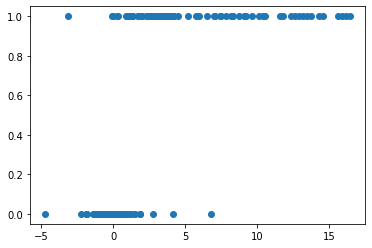

In [ ]:
plt.scatter(X_train['V2'],Y_train)

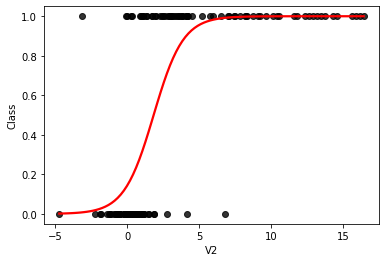

In [ ]:
sns.regplot(x=X_train['V2'], y=Y_train,logistic=True,ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

---

# Model Evaluation

1. Accuracy

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9928571428571429


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9444444444444444


2. Mean Square Error

In [ ]:
X_test_prediction = model.predict(X_test)
print("Men Squared Error on test dataset =",mean_squared_error(Y_test,X_test_prediction))

Men Squared Error on test dataset = 0.05555555555555555


In [ ]:
X_whole=credit_card_data.drop(columns='Class',axis=1)
Y_whole=credit_card_data['Class']
X_whole_prediction=model.predict(X_whole)

print("Men Squared Error on whole datatset =",mean_squared_error(Y_whole,X_whole_prediction))

Men Squared Error on whole datatset = 0.05957003163646822


----